EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 1**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `Josseline Yariela Canales` `jycanalesb@estudiante.uc.cl`
  - `Gabriel Eduardo Oquelí` `geoquelir@estudiante.uc.cl`
- Usuario de GitHub (opcional):   `jycanalesb` josselinecanales1502@hotmail.com
  `GabOqueli-16062022` gabriel.oqueli@unah.hn
 `Repositorio`: https://github.com/GabOqueli-16062022/Aplicaciones_Machine_Learning_economia.git


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 4 de abril a las 18:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    3    |
| Pregunta 1.2                   |    3    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    2    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    5    |
| Pregunta 1.8                   |   7    |
| Pregunta 1.9                   |   5    |
| Pregunta 1.10                  |   5    |
| Pregunta 1.11                  |   6    |
| Pregunta 1.12                  |    2    |
| Pregunta 1.13                  |    5    |
| Pregunta 1.14                  |   10    |
| Pregunta 1.15                  |    5    |
| Pregunta 1.16                  |    5    |
| Pregunta 2.0                   |    2    |
| Pregunta 2.1                   |    5    |
| Pregunta 2.2                   |    5    |
| Pregunta 2.3                   |    5    |
| Pregunta 2.4                   |    3    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    2    |
| Pregunta 2.7                   |    2    |

Total: 100 pts.


### Sobre el Bonus

- La entrega, por defecto, es a través de Canvas. Sin embargo, puede escoger voluntariamente entregar la tarea en su GitHub personal.

- Si usted realiza la entrega en GitHub antes de la **fecha y hora indicada**, entonces tendrá una bonificación de 0.3 en su nota final de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub, entonces su calificación en esta tarea será de 6.8.

- Si **además** de realizar la entrega a través de GitHub, usted logra crear `branches` (ramas) y realizar un `merge` entre ramas, entonces se le bonificará con 0.5 en su nota de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub e hizo el trabajo de ramas, entonces su calificación en esta tarea será de 7.0.

  - Se valora capacidad autodidacta.
  - Sólo serán considerados los archivos contenidos en su rama principal a la fecha y hora indicada.



## Exploratory data analysis (EDA)

Para esta tarea se utilizará como principal fuente de información un dataset con una serie de características económicas, demográficas y de desarrollo humano de distintos países a la fecha de 2007 (corte transversal). El dataset está disponible en el siguiente [Github](https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv).<br>

Descripción del dataset:

Variables:

*   date: Fecha en la que se actualizó la data.
*   Population, Area (sq. mi.) Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita, Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service: Características del país.
*   source: fuente de los datos.
*   Region: Región (grupo de países).
*   Country: País.

### Pregunta 1.0

Importe las librerías que usará en su tarea.

In [112]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #Particiona en datos de entrenamiento y prueba
# Librerías manejo de datos
import pandas as pd
import numpy as np
# Librerías para graficar
import matplotlib.pyplot as plt #graficos generales
import seaborn as sns #graficos estadisticos

# Librería que filtra warnings innecesarios
import warnings  #Usar para el proyecto
warnings.filterwarnings("ignore")

### Pregunta 1.1

Importe el dataset como un DataFrame (df) directamente desde Github (es decir, no descargue el archivo manualmente). A lo largo de la tarea este df se denominará como `df`.


In [113]:
# Cargamos el dataset desde el repositorio GitHub
url = "https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv"
df = pd.read_csv(url)

### Pregunta 1.2

Utilice las funciones de Pandas `head()`, `tail()`, `info()` y la propiedad (o atributo) `.dtypes` para describir el `df`. Explique brevemente para qué sirve cada función.

In [114]:
df.head()  # Visualizar las 5 primeras filas

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [115]:
df.tail() #Muestra las últimas filas del Dataframe.

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,2007-01-01,US Goverment,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,...,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [116]:
df.info() #visualizar tipo de datos, enteros (int) son dos variables, decimales(float) 16 variables y 4 object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                227 non-null    object 
 1   source                              227 non-null    object 
 2   Country                             227 non-null    object 
 3   Region                              227 non-null    object 
 4   Population                          227 non-null    int64  
 5   Area (sq. mi.)                      227 non-null    int64  
 6   Pop. Density (per sq. mi.)          227 non-null    float64
 7   Coastline (coast/area ratio)        227 non-null    float64
 8   Net migration                       224 non-null    float64
 9   Infant mortality (per 1000 births)  224 non-null    float64
 10  GDP ($ per capita)                  226 non-null    float64
 11  Literacy (%)                        209 non-n

In [117]:
# Para revisar los tipos de datos de todas las columnas.
tipos = df.dtypes
print(tipos)

date                                   object
source                                 object
Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                           

### Pregunta 1.3

La variable `source` es innecesaria debido que contiene el mismo valor para todas las observaciones. Elimine esta variable de su `df`.

In [118]:
#Eliminar la columna de la variable source

df = df.drop('source', axis= 1) #Axis=1 indica que se elimina columna completa.

In [119]:
df.head()  #Comprobación de eliminación de 'source'

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Pregunta 1.4

Transforme el tipo de la variable `date` a `datetime` _datatype_.

In [120]:
# Se transforma a formato datetime, sobreescribiendo la columna. por defecto es año-mes-dia (aammdd).
df["date"] = pd.to_datetime(df["date"])

In [121]:
df.dtypes #verificación del cambio de date object a datetime64[ns]

date                                  datetime64[ns]
Country                                       object
Region                                        object
Population                                     int64
Area (sq. mi.)                                 int64
Pop. Density (per sq. mi.)                   float64
Coastline (coast/area ratio)                 float64
Net migration                                float64
Infant mortality (per 1000 births)           float64
GDP ($ per capita)                           float64
Literacy (%)                                 float64
Phones (per 1000)                            float64
Arable (%)                                   float64
Crops (%)                                    float64
Other (%)                                    float64
Climate                                      float64
Birthrate                                    float64
Deathrate                                    float64
Agriculture                                  f

In [122]:
df.head() #Comprobación adicional

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Pregunta 1.5

Para determinar si las variables son "útiles" y sus valores son "correctos" es necesario comprender cada uno de los atributos del dataset.
Investigue y explique brevemente la relación **teórica** entre el `GDP (% per capita)` y cada una de las variables denominadas como "Características del país" en la introducción.

Ejemplo: Existe una variable denominada `Coastline (coast/area ratio)`. Coastline es una medida de la cantidad de costa (acceso a mar) del país normalizada al área total del país para no beneficiar a países más grandes pero con la misma proporción de costa. A mayor "Costline" aumenta la capacidad portuaria per capita del país, más puertos facilita el comercio y podría aumentar el GDP per cápita.




---


*Escriba* su respuesta en esta celda...

`Population`: El efecto puede ser ambiguo, una mayor población puede significar mayor consumo, mayor capital humano, impulsando el crecimiento económico. Sin embargo si no hay suficiente generación de empleo, suficiente inversión e infraestructura para soportar la sobrepoblación puede diluir los efectos positivos, resultando en un menor `GDP (% per capita`.

`Area (sq. mi.) `: El tamaño geográfico de un país no tiene una relación directa con el `GDP (% per capita`. Aunque los países más grandes pueden tener más recursos naturales o mercados más grandes, estas ventajas no se traducen siempre en un mayor PIB per cápita, como se observa en diversos ejemplos a nivel mundial (Rusia).

`Pop. Density (per sq. mi.)`: Una alta densidad poblacional a menudo se asocia con mejor acceso a servicios, infraestructuras y mercados, lo que puede incrementar la productividad y así contribuir a un mayor `GDP (% per capita`. Esta relación es especialmente notoria en áreas urbanas de países desarrollados. En países en vías de desarrollo no es igual.

`Net migration`: Un país con migración neta positiva suele ser más atractivo por sus oportunidades económicas, lo que prácticamente se asocia con un mayor PIB per cápita. Sin embargo, la migración excesiva puede presionar los servicios públicos pero por otro lado implica mayor fuerza laboral y esto puede fomentar el crecimiento económico.

`Infant mortality (per 1000 births)`: Una alta mortalidad infantil suele reflejar condiciones precarias en salud y servicios públicos, lo que está asociado a bajos niveles de desarrollo y por tanto bajo PIB per cápita.

`Alfabetización (%)`: Relación positiva entre alfabetización y PIB per cápita. La educación mejora la productividad de la población y promueve el desarrollo económico en un país.

` Phones (per 1000)`: Tiene relación positiva  con el `GDP (% per capita`. Representa mayor acceso tecnológico, mayor infraestructura de comunicación en un país, lo cual mejora la eficiencia económica y por ende el desarrollo.

`Arable (%) `: Tener alto porcentaje de tierra cultivable, puede ser ventajoso para países agrícolas, pero no necesariamente implica mayor PIB per cápita si la economía no está diversificada o si la productividad es baja.

`Crops (%)`: Es similar a tener alto porcentaje de tierra cultivable, dependerá de la eficiencia y el valor agregado que tengan dichos nichos agrícolas. Muchas veces las economías agrícolas están menos industrializadas, además la tierra tiende a estar en pocas manos (riqueza concentrada), por tanto se asocia a un menor `GDP (% per capita`.

`Climate`: El clima afecta el desarrollo económico a través de la agricultura, la salud y la productividad. “Los climas tropicales pueden enfrentar mayores cargas de enfermedades, como la malaria, mientras que los climas templados, como en Europa Occidental, suelen apoyar actividades agrícolas diversas y tienen menores costos de salud, influyendo positivamente en el PIB per cápita.” Este impacto varía según el tipo de clima, y estudios como los de Jeffrey Sachs ( Clima y Desarrollo ) destacan estas diferencias.

`Natalidad`: Relación negativa con el `GDP (% per capita`. Altas tasas de mortalidad suelen estar relacionadas con menor desarrollo económico ya que implican mayores gastos para el fisco, en términos educativos y de salud, lo que puede reducir el PIB per cápita en el corto y mediano plazo
`Tasa de mortalidad`: Similar a la variable de `Natalidad`. Altas tasas de mortalidad indican baja esperanza de vida y peor acceso a salud, esto se relaciona con un bajo `GDP (% per capita`.

`Agriculture`: Un alto porcentaje de agricultura puede indicar que la economía está poco diversificada ya que tiene dependencia de la agricultura, esto se da mucho en economías que están en vías de desarrollo, por lo que suele estar negativamente correlacionada con el `GDP (% per capita`.

`Industry`: Un mayor peso de la industria puede indicar un proceso de industrialización que favorece el crecimiento económico, en este sentido suele haber una relación positiva con el PIB per cápita.

`Service`: Las economías más desarrolladas tienden a tener un sector de servicios más grande. Las economías más desarrolladas tienden a tener un sector de servicios más grande (finanzas, tecnología, educación, salud), por lo que se espera una fuerte relación positiva con el PIB per cápita.

---



In [123]:
df.info() #visualizar tipo de datos, enteros, decimales o strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                227 non-null    datetime64[ns]
 1   Country                             227 non-null    object        
 2   Region                              227 non-null    object        
 3   Population                          227 non-null    int64         
 4   Area (sq. mi.)                      227 non-null    int64         
 5   Pop. Density (per sq. mi.)          227 non-null    float64       
 6   Coastline (coast/area ratio)        227 non-null    float64       
 7   Net migration                       224 non-null    float64       
 8   Infant mortality (per 1000 births)  224 non-null    float64       
 9   GDP ($ per capita)                  226 non-null    float64       
 10  Literacy (%)              

### Pregunta 1.6

Calcule estadísticas descriptivas para cada variable numérica.

In [124]:
# describe() entrega estadísticas descriptivas para variables numéricas.
stats_descriptivas = df.describe()
print(stats_descriptivas)

#Algunos resultados: La media de la variable Población es de aproximadamente 28.7 millones de personas. En cuanto al Área por Milla Cuadrada tiene un promedio de 598,227,000 millas. La Densidad Poblacional: Presenta un Promedio de 379.04 por milla cuadrada, con un máximo de 16,271.5. y asi sucesivamente.

                      date    Population  Area (sq. mi.)  \
count                  227  2.270000e+02    2.270000e+02   
mean   2007-01-01 00:00:00  2.874028e+07    5.982270e+05   
min    2007-01-01 00:00:00  7.026000e+03    2.000000e+00   
25%    2007-01-01 00:00:00  4.376240e+05    4.647500e+03   
50%    2007-01-01 00:00:00  4.786994e+06    8.660000e+04   
75%    2007-01-01 00:00:00  1.749777e+07    4.418110e+05   
max    2007-01-01 00:00:00  1.313974e+09    1.707520e+07   
std                    NaN  1.178913e+08    1.790282e+06   

       Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
count                  227.000000                    227.000000   
mean                   379.047137                     21.165330   
min                      0.000000                      0.000000   
25%                     29.150000                      0.100000   
50%                     78.800000                      0.730000   
75%                    190.150000                     10.

### Pregunta 1.7

Según corresponda, realice un gráfico de distribución de densidad o histograma para describir 3 variables del `df` que usted crea más relevantes.

¿Por qué es importante analizar las distribuciones de las variables a utilizar en su modelo? Ejemplifique su respuesta con al menos una de las variables del df`.

<Axes: xlabel='GDP ($ per capita)', ylabel='Density'>

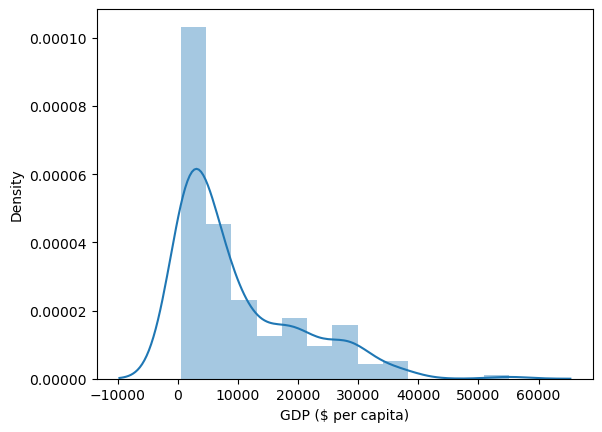

In [125]:
# Distribución de densidad: Para Variable de ínteres: GDP ($ per capita).

sns.distplot(df['GDP ($ per capita)']) #Muestra una concentración a la  izquierda

<Axes: xlabel='Literacy (%)', ylabel='Density'>

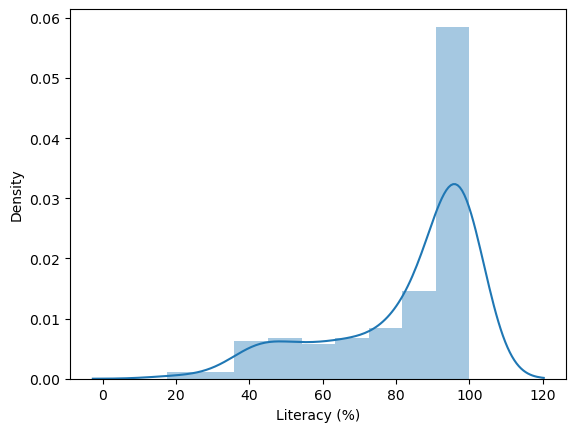

In [126]:
# 1) Distribución de densidad: Para Variable Alfabetización, Se considera relevante porque tiene un impacto significativo en el GDP (%) de un país por varias razones: Altas tasas de alfabetización  resulta en trabajadores más capacitados y productivos, ademas tienden a tener mejores oportunidades laborales, lo que aumenta sus ingresos y por tanto contribuyen al crecimiento economico.
sns.distplot(df['Literacy (%)'])
#Presenta una distribución asimetrica, es decir no distribuye normal. En ML es importante la distribución normal ya que los modelos funcionan mucho mejor.
#En el gráfico se observa que la mayoría de los países tienen altos niveles de alfabetización (entre 80% y 100%). En la cola izquierda hay algunos paises con alfabetizacion muy baja. También se observa valores outliers, por arriba de 100%, lo cual no es posible, puede que sea un error de digitación.

La variable `Alfabetización (%)` no sigue una distribución normal y esto puede reducir el desempeño de algunos modelos de regresión. Por lo que se realizará una transformación logarítmica.

<Axes: xlabel='Literacy_Log', ylabel='Density'>

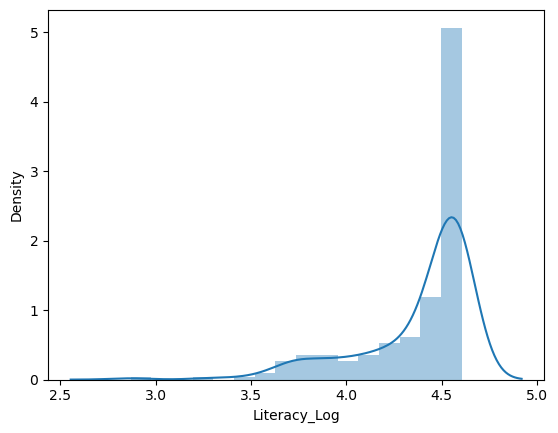

In [127]:
np.log(df['Literacy (%)'])  # Utilizamos función log de la librería numpy.
df['Literacy_Log'] = np.log(df['Literacy (%)'])  # Creamos una nueva columna con la transformación
sns.distplot(df['Literacy_Log'])

<Axes: xlabel='Industry', ylabel='Density'>

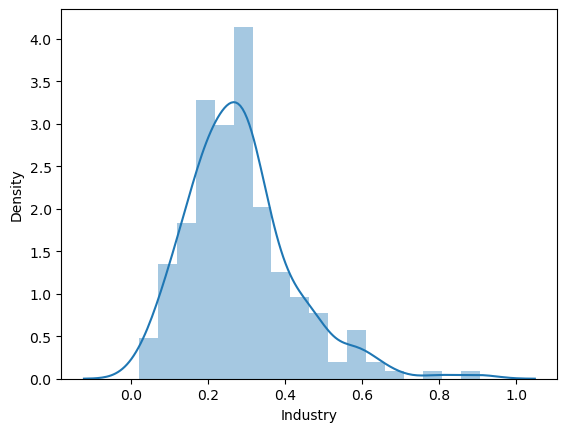

In [128]:
# 2) Distribución de densidad: Para Variable: Industria
sns.distplot(df['Industry']) # Se observa una distribucion con una leve concetracion a la izquierda. Reescalaremos en logaritmo

La gráfica de densidad para la `Industry` muestra una concentración leve hacia la izquierda , lo que indica que la mayoría de los valores de la variable Industria están agrupados en valores pequeños. Esto podría sugerir que, en la mayoría de los países analizados, el sector industrial no es dominante, y que la mayoría de paises estan basadas en agricultura u otra rama de actividad económica.

<Axes: xlabel='Service', ylabel='Density'>

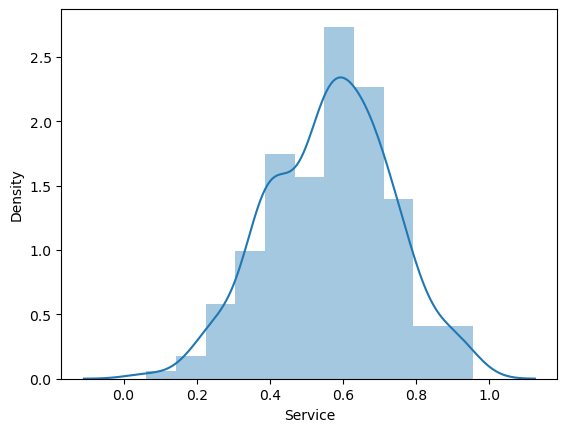

In [129]:
# Distribución de densidad: Para Variable: Servicios
sns.distplot(df['Service'])




---


Lo imporante de estas variables vista de una perspectiva economica como por ejemplo el modelo de Solow, que menciona que el crecimiento del PIB per cápita depende del `capital físico`, el `capital humano` y el `progreso tecnológico`. La ,`alfabetización` incrementa el capital humano y mejora la productividad laboral. La `industria` impulsa la acumulación de capital y la adopción tecnológica, mientras que el `sector servicios`, característico de economías avanzadas, aporta valor agregado y refleja altos niveles de desarrollo. Estas tres variables están positivamente relacionadas con el crecimiento económico sostenido, y esto lo podemos observar en los graficos donde los paises con mayor riqueza se generan esta mayor concentracion de dichas caracteristicas en los graficos.


---



### Pregunta 1.8

El df contiene variables con missing values (`NaN`). Impute los `NaN` con el método que estime conveniente, justificando su decisión.

¿Es pertinente eliminar alguna de estas variables? Hágalo si es el caso.

In [130]:
# Pimero Analizamos el numero de valores missing que hay por cada columna y que porcentaje representa de la muestra total
# Cantidad y porcentaje de missing por variable
missing_conteo = df.isnull().sum().to_frame(name='Valores Nulos') # Se calcula la cantidad de valores nulos por cada columna y lo guarda en un nuevo dataFrame
missing_conteo['% Valores Nulos'] = (missing_conteo['Valores Nulos'] / len(df)) * 100 # Agregamos una nueva columna con el porcentaje de valores nulos respecto al total de filas y len(df) entrega el número total de filas u observaciones
missing_conteo= missing_conteo[missing_conteo['Valores Nulos'] > 0].sort_values(by='% Valores Nulos', ascending=False) # Se filtra solo las columnas que tienen al menos un valor nulo
print(missing_conteo)

                                    Valores Nulos  % Valores Nulos
Climate                                        22         9.691630
Literacy (%)                                   18         7.929515
Literacy_Log                                   18         7.929515
Industry                                       16         7.048458
Agriculture                                    15         6.607930
Service                                        15         6.607930
Phones (per 1000)                               4         1.762115
Deathrate                                       4         1.762115
Net migration                                   3         1.321586
Infant mortality (per 1000 births)              3         1.321586
Birthrate                                       3         1.321586
Arable (%)                                      2         0.881057
Crops (%)                                       2         0.881057
Other (%)                                       2         0.88

In [131]:
df_imputado = df.copy() #Por seguridad creamos una copia del df original para no modificarlo directamente
# Imputamos sobre columnas numéricas del df
# Usamos apply por fila para rellenar los valores nulo con la mediana de su región
for col in df_imputado.select_dtypes(include='number').columns:
     df_imputado[col] = df_imputado.apply(
        lambda row: df_imputado[df_imputado['Region'] == row['Region']][col].median() #Se busca rellenar  la informacion segun la media de la region a donde pertence el pais que tiene ese valor nulo
        if pd.isna(row[col]) else row[col],
        axis=1
    )
print(df_imputado.isna().sum())

date                                  0
Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
Literacy_Log                          0
dtype: int64


In [132]:
# Reemplazamos el df original con el imputado
df = df_imputado.copy()




---


Se identificó la presencia de valores nulos en algunas variables; sin embargo, en ningún caso estos superan el 10% del total de observaciones, tal como se detalló en el análisis de la celda anterior. Por esta razón, no se optó por eliminar dichas variables. Para abordar la imputación de los datos faltantes, se decidió utilizar la mediana (median) en el caso de las variables numéricas, dado que esta medida es robusta frente a valores atípicos. Además, la imputación se realizó por región, con el fin de asignar a los países con datos faltantes un valor más representativo de su contexto geográfico.


---


### Pregunta 1.9

¿Cómo distribuye el `GDP ($ per capita)` en diferentes **regiones**? Defina una forma ilustrativa de gráficar el `GDP ($ per capita)` para todas las regiones en un mismo gráfico. Interprételo.

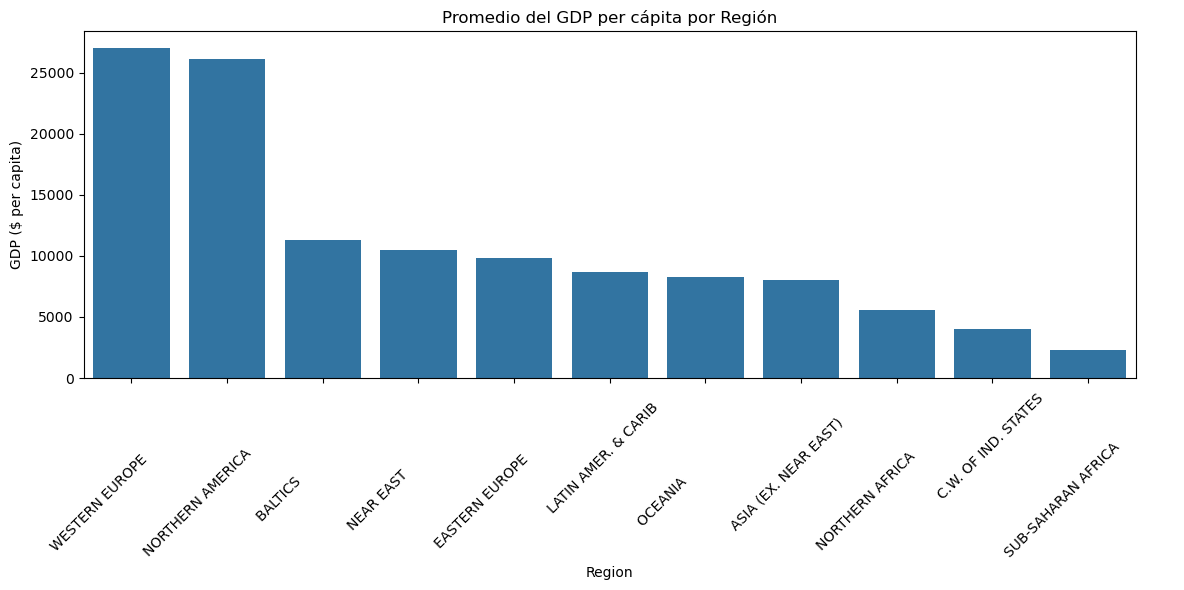

In [133]:
# Calculamos la media de GDP per cápita agrupando por región
gdp_mean = df.groupby('Region')['GDP ($ per capita)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
# Barplot usando el nombre de región como eje x y el valor promedio como y
sns.barplot(x=gdp_mean.index, y=gdp_mean.values)
plt.xticks(rotation=45)
plt.title('Promedio del GDP per cápita por Región')
plt.ylabel('GDP ($ per capita)')
plt.tight_layout()
plt.show()

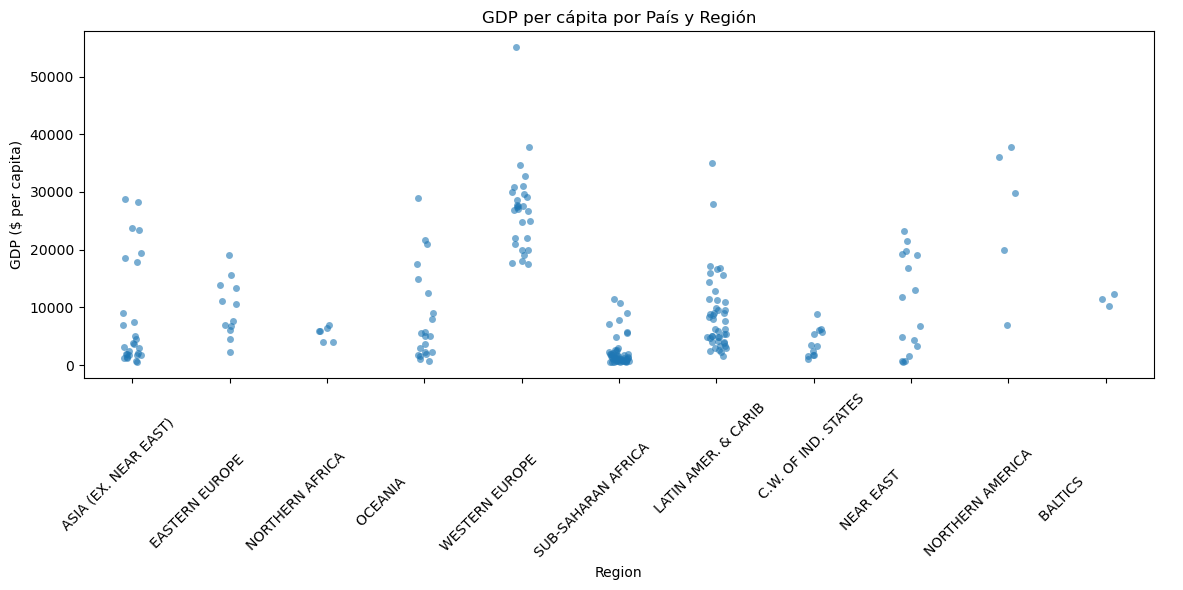

In [134]:
# Creamos el grafico
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Region', y='GDP ($ per capita)', jitter=True, alpha=0.6)# Con jitter ayuda a mejor dispersion de los puntos para su analisis y alpha=0.6 para hacer los puntos un poco transparentes
plt.xticks(rotation=45)
plt.title('GDP per cápita por País y Región')
plt.tight_layout()
plt.show()




---


Se analizaron las diferencias en la distribución del GDP per cápita entre regiones a través de dos enfoques gráficos complementarios: un barplot que muestra el promedio regional y un stripplot que representa individualmente a cada país. El primer gráfico revela que regiones como Europa Occidental y América del Norte presentan los niveles promedio más altos de ingreso per cápita, mientras que África Subsahariana, Northern y los países bálticos registran los promedios más bajos, considerando los datos de manera agregada. Por otro lado, el stripplot permite observar con mayor detalle la heterogeneidad dentro de cada región, destacándose diferencias significativas entre países de una misma zona, particularmente en regiones como Asia y América Latina, donde algunos países presentan niveles de ingreso cercanos a los de Europa Occidental.


---


### Pregunta 1.10

Supongamos que `GDP ($ per capita)` es su variable objetivo. Estudie la correlación de esta variable con el resto de las variables del `df`. ¿Por qué es importante analizar la correlación entre las variables?



In [135]:
#Definimos la variable objetivo
target_variable = 'GDP ($ per capita)'
# Calcular la matriz de correlación
matriz_corr = df[df.dtypes[df.dtypes != "object"].index].corr()[target_variable].sort_values(ascending=False)
print(matriz_corr)

GDP ($ per capita)                    1.000000
Phones (per 1000)                     0.832364
Service                               0.553994
Literacy (%)                          0.508839
Literacy_Log                          0.466180
Net migration                         0.382029
Climate                               0.369130
Pop. Density (per sq. mi.)            0.196063
Other (%)                             0.093737
Area (sq. mi.)                        0.072460
Coastline (coast/area ratio)          0.049561
Arable (%)                            0.023937
Industry                             -0.034993
Population                           -0.038915
Deathrate                            -0.196322
Crops (%)                            -0.218093
Agriculture                          -0.585987
Infant mortality (per 1000 births)   -0.595432
Birthrate                            -0.643199
date                                       NaN
Name: GDP ($ per capita), dtype: float64


In [136]:
#Observamos las variables de  mayor correlacion en valor absoluto.
corr_abs_gdp = matriz_corr.abs()
corr_abs_gdp = corr_abs_gdp.sort_values(ascending=False)
print(corr_abs_gdp)

GDP ($ per capita)                    1.000000
Phones (per 1000)                     0.832364
Birthrate                             0.643199
Infant mortality (per 1000 births)    0.595432
Agriculture                           0.585987
Service                               0.553994
Literacy (%)                          0.508839
Literacy_Log                          0.466180
Net migration                         0.382029
Climate                               0.369130
Crops (%)                             0.218093
Deathrate                             0.196322
Pop. Density (per sq. mi.)            0.196063
Other (%)                             0.093737
Area (sq. mi.)                        0.072460
Coastline (coast/area ratio)          0.049561
Population                            0.038915
Industry                              0.034993
Arable (%)                            0.023937
date                                       NaN
Name: GDP ($ per capita), dtype: float64



---


Cuando calculamos la correlación entre GDP per cápita con respecto al resto de las variables numéricas, observamos que las tres variables con mayor correlación positiva son: Phones (per 1000) con 0.83, Service 0.55 y Literacy (%) 0.51. La cuales  como se menciono en incisos anteiores estan asociadas al nivel de desarrollo económico: un mayor acceso a tecnología y telecomunicaciones, una población más educada y un sector servicios fuerte suelen ser características de países con mayores niveles de ingreso per cápita. Esto concuerda con la teoría del crecimiento endógeno y los postulados del modelo de Solow, que destacan el papel del capital humano y la tecnología en el crecimiento económico.

Caso contrario, las variables con mayor correlación negativa son Agriculture -0.58, Birthrate -0.65 e Infant mortality -0.60, lo cual refleja que los países con mayores tasas de natalidad, mortalidad infantil y dependencia del sector agrícola tienden a tener menores niveles de PIB per cápita. Las cuales suelen asociarse a etapas tempranas de desarrollo económico, menor acceso a salud, y menor sector productivo.

Analizar las correlaciones es crucial para entender qué variables explican mejor las diferencias en los niveles de ingreso entre países. Además, este análisis orienta la selección de variables relevantes para futuros modelos predictivos, y permite detectar inconsistencias o problemas multicolinealidad entre ellas.


---


### Pregunta 1.11

Realice tres _scatterplots_ (uno por variable) de las tres variables con la mayor correlación con la variable objetivo.

Utilizando los parámetros de la función con la que hizo los _scatterplots_, coloque un título a cada gráfico y agregue colores a los _data points_ del _scatterplot_- Use colores diferentes por cada gráfico.

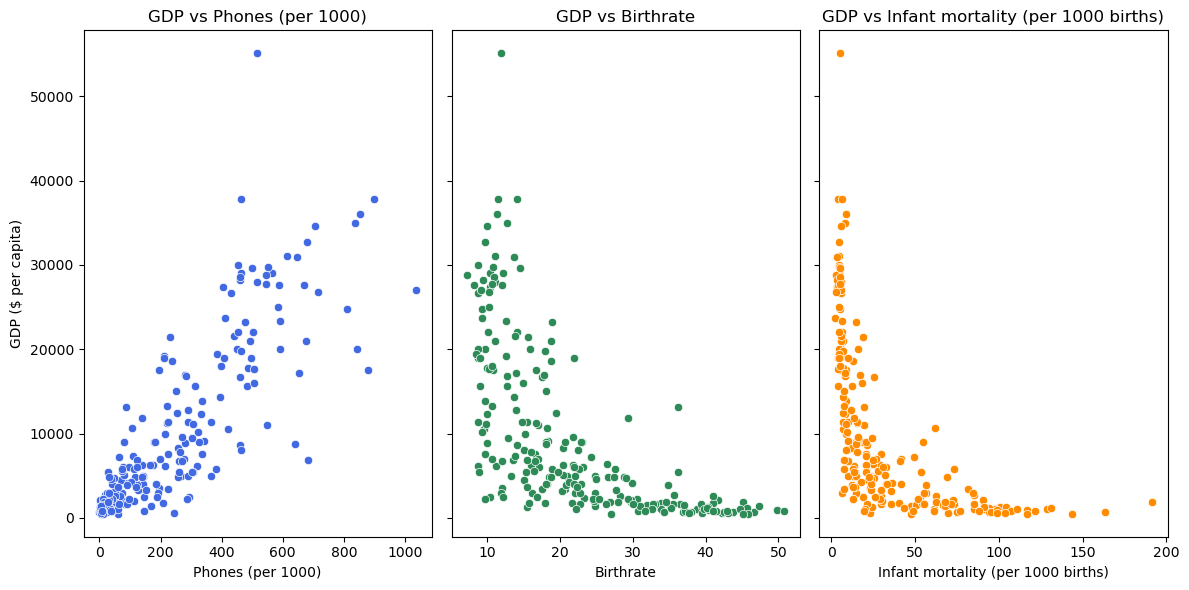

In [137]:
#Definimos el tamaño de las graficas
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
# Lista de variables a graficar
variables = ['Phones (per 1000)', 'Birthrate', 'Infant mortality (per 1000 births)']
colores = ['royalblue', 'seagreen', 'darkorange']
# Recorremos cada variable para graficar
for i, var in enumerate(variables):
    sns.scatterplot(data=df, x=var, y='GDP ($ per capita)', ax=axes[i], color=colores[i])
    axes[i].set_title(f'GDP vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('GDP ($ per capita)' if i == 0 else '')  # Solo primer gráfico con eje Y
plt.tight_layout()
plt.show()

### Pregunta 1.12

Cree una nueva columna `GDP (%)` que represente el GDP total de cada pais (no per capita) y agreguela al dataframe.

In [138]:
# Creamos una nueva columna con el GDP total = PIB Per cápita multiplicado por la Población.
df['GDP ($)'] = df['GDP ($ per capita)'] * df['Population']
#Mostramos el df con la  variables agregada
df.head()

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Literacy_Log,GDP ($)
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,3.583519,2.173990e+10
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,4.460144,1.611745e+10
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,4.248495,1.975805e+11
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,4.574711,4.623520e+08
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,4.605170,1.352819e+09


### Pregunta 1.13

Repita el análisis de correlaciones para `GDP ($)` excluyendo `GDP ($ per capita)` del análisis. ¿Cambian las variables que más correlacionan? Justifique.

In [139]:
# Definimos la variable objetivo
target_variable = 'GDP ($)'
# Creamos un DataFrame numérico excluyendo explícitamente 'GDP ($ per capita)'
df_corr_subset = df.select_dtypes(include='number').drop(columns=['GDP ($ per capita)'], errors='ignore')
# Calculamos la matriz de correlación solo con las variables seleccionadas
correlation_matrix_gdp_total = df_corr_subset.corr()
# Extraemos la correlación de GDP ($) con el resto de variables
gdp_total_corr = correlation_matrix_gdp_total[target_variable].sort_values(ascending=False)
print(gdp_total_corr)

GDP ($)                               1.000000
Population                            0.639528
Area (sq. mi.)                        0.556396
Phones (per 1000)                     0.233484
Arable (%)                            0.129928
Climate                               0.116941
Literacy (%)                          0.099417
Literacy_Log                          0.093888
Service                               0.085096
Net migration                         0.054632
Industry                              0.050399
Pop. Density (per sq. mi.)           -0.028487
Deathrate                            -0.035820
Other (%)                            -0.064882
Coastline (coast/area ratio)         -0.065211
Crops (%)                            -0.077078
Infant mortality (per 1000 births)   -0.122076
Agriculture                          -0.139516
Birthrate                            -0.166889
Name: GDP ($), dtype: float64


In [140]:
# Obtenemos el valor absoluto y ordenamos de manera descendente.
corr_abs_total_gdp = gdp_total_corr.abs().sort_values(ascending=False)
# Mostramos el resultado
print(corr_abs_total_gdp)

GDP ($)                               1.000000
Population                            0.639528
Area (sq. mi.)                        0.556396
Phones (per 1000)                     0.233484
Birthrate                             0.166889
Agriculture                           0.139516
Arable (%)                            0.129928
Infant mortality (per 1000 births)    0.122076
Climate                               0.116941
Literacy (%)                          0.099417
Literacy_Log                          0.093888
Service                               0.085096
Crops (%)                             0.077078
Coastline (coast/area ratio)          0.065211
Other (%)                             0.064882
Net migration                         0.054632
Industry                              0.050399
Deathrate                             0.035820
Pop. Density (per sq. mi.)            0.028487
Name: GDP ($), dtype: float64





---


Los resultados de este ejercicio muestran un cambio notable en las variables más correlacionadas cuando se utiliza GDP en lugar de GDP per capita. Las variables con mayor correlación absoluta con el PIB total son Population, Area (sq. mi.) y Phones (per 1000), lo cual es coherente desde el punto de vista económico, ya que el PIB total es una medida agregada que depende directamente del tamaño del país, tanto en población como en extensión territorial.

A diferencia del análisis anterior, donde predominaban variables asociadas al desarrollo humano como la alfabetización o la participación del sector servicios, en este caso toman mayor relevancia las variables de tipo estructural y demográficas. Esto se debe a que el PIB per cápita mide el ingreso promedio por persona (nivel de desarrollo), mientras que el PIB total refleja el tamaño absoluto de la economía.

Un punto interesante es que, al observar las correlaciones en valor absoluto, el orden de las tres principales variables no varía en este caso, a diferencia del análisis anterior, donde algunas variables tenían una fuerte correlación negativa. En resumen, los resultados son consistentes con la interpretación económica de cada indicador y reflejan adecuadamente la diferencia conceptual entre ambos tipos de PIB.


---


### Pregunta 1.14

Detecte las observaciones outliers de las tres variables seleccionadas en la pregunta anterior. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

In [141]:
# Lista de variables a analizar
variables_analisis = ['Population', 'Area (sq. mi.)', 'Phones (per 1000)']
# Diccionario donde guardaremos el resultado
porcentaje_outliers = {}
# Se realiza un loop sobre cada variable para analizar los quantiles
for var in variables_analisis:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Se toma el primer cuartil
    upper_bound = Q3 + 1.5 * IQR  # Se toma el tercer cuartil
    n_outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)].shape[0] # Identificamos cuántos valores están fuera de los límites
    total = df.shape[0]
    porcentaje = (n_outliers / total) * 100
    porcentaje_outliers[var] = round(porcentaje, 2) # Calculamos el porcentaje de outliers
# Resultado
outliers_df = pd.DataFrame.from_dict(porcentaje_outliers, orient='index', columns=['% de Outliers'])
print(outliers_df)

                   % de Outliers
Population                 12.33
Area (sq. mi.)             12.33
Phones (per 1000)           0.44


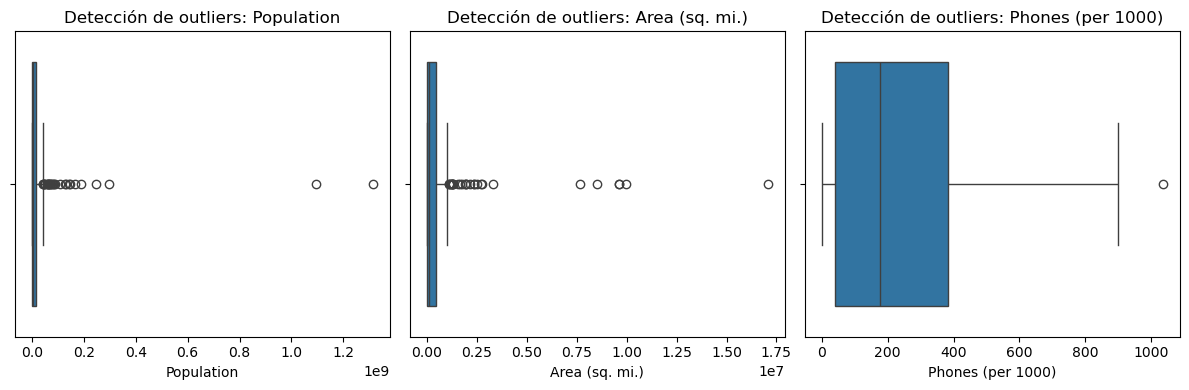

In [142]:
# Creamos un gráfico boxplot para un mejor análisis visual y asi determinar de que forma tratar los outliers.
plt.figure(figsize=(12, 4))
for i, var in enumerate(variables_analisis):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Detección de outliers: {var}')
plt.tight_layout()
plt.show()

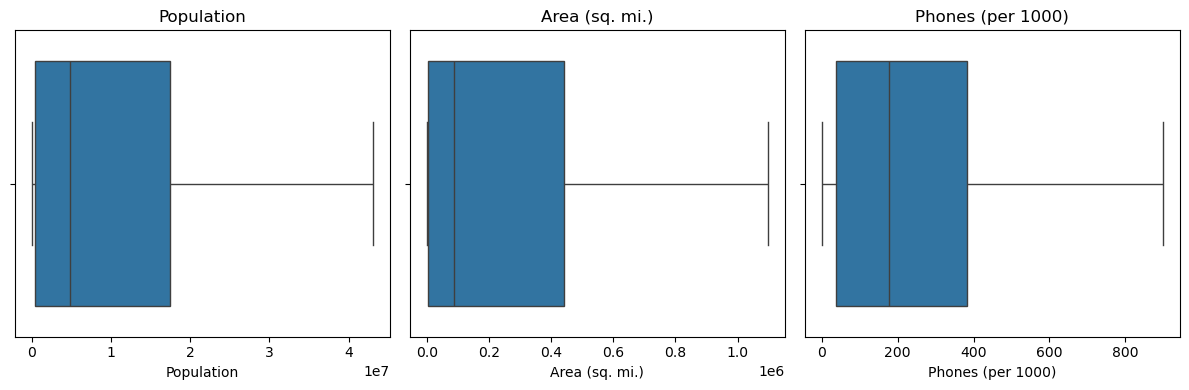

In [143]:
df_imputado = df.copy() # Copiamos el df original para no modificarlo directamente
variables_imputar = ['Population', 'Area (sq. mi.)',  'Phones (per 1000)'] # Variables a imputar con límite superior tal  y como se ve en el boxplot
for var in variables_imputar:
    Q1 = df_imputado[var].quantile(0.25)
    Q3 = df_imputado[var].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df_imputado.loc[df_imputado[var] > upper_bound, var] = upper_bound
# Analisis Grafico
plt.figure(figsize=(12, 4))
for i, var in enumerate(variables_imputar):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_imputado[var])
    plt.title(f'{var}')
plt.tight_layout()
plt.show()

In [144]:
# Actualizamos el df original  y verificamos que esté correcto
df = df_imputado
df.head()

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Literacy_Log,GDP ($)
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.00,48.0,0.00,23.06,163.07,700.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,3.583519,2.173990e+10
1,2007-01-01,Albania,EASTERN EUROPE,3581655.0,28748.00,124.6,1.26,-4.93,21.52,4500.0,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,4.460144,1.611745e+10
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091.0,1097556.25,13.8,0.04,-0.39,31.00,6000.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,4.248495,1.975805e+11
3,2007-01-01,American Samoa,OCEANIA,57794.0,199.00,290.4,58.29,-20.71,9.27,8000.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,4.574711,4.623520e+08
4,2007-01-01,Andorra,WESTERN EUROPE,71201.0,468.00,152.1,0.00,6.60,4.05,19000.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,4.605170,1.352819e+09





---


A través del análisis por cuartiles y el uso de varios boxplots, se identificaron valores atípicos en las variables Population, Area (sq. mi.) y Phones (per 1000), los cuales representan aproximadamente un 12% del total de observaciones en cada caso. En el caso de Population y Area sq, estos outliers podrían corresponder a países con grandes extensiones territoriales o poblaciones muy numerosas. Para mitigar su impacto sin eliminar observaciones valiosas que quizá nos sirvan para análisis futuros, se optó por imputar dichos valores, reemplazándolos por el límite superior definido por el análisis de cuartiles, buscando así suavizar su efecto en el análisis posterior.


---



### Pregunta 1.15

En los ejemplos anteriores calculamos correlaciones para `GDP ($ per capita)` y `GDP ($)`. Genere un nuevo dataframe que tenga le variación porcentual de la correlación absoluta para cada una de las columnas de características, e.g., si la correlación en valor absoluto de `GDP ($ per capita)` vs `Industry` es 0.1 y la correlación `GDP ($)` vs `Industry` es 0.5, la variación deberá ser +500%. Dicha variación porcentual puede ser positiva o negativa, pero ordene los el dataframe de tal manera que la variación de correlación absoluta sea desendiente.

In [145]:
# Correlacion del GDP percapita
corr_gdp_pc = corr_abs_gdp
corr_gdp_pc =  corr_abs_gdp.dropna()
# Correlacion del GDP Total
corr_gdp_total = corr_abs_total_gdp
comparacion_corr = pd.DataFrame({ #Unimos ambas correlaciones en un nuevo df para compararlas fácilmente
    'GDP per capita': corr_gdp_pc,
    'GDP total': corr_gdp_total
})

comparacion_corr['Variación %'] = ( # Calculamos variación porcentual (evitando división por cero)
    (comparacion_corr['GDP total'] - comparacion_corr['GDP per capita']) /
    comparacion_corr['GDP per capita'].replace(0, 1)
) * 100

comparacion_corr = comparacion_corr.dropna().sort_values(by='Variación %', ascending=False) # Quitamos NaN  de GDP total y percapita, despues ordenamos

print(comparacion_corr)

                                    GDP per capita  GDP total  Variación %
Population                                0.038915   0.639528  1543.415756
Area (sq. mi.)                            0.072460   0.556396   667.866203
Arable (%)                                0.023937   0.129928   442.802844
Industry                                  0.034993   0.050399    44.026351
Coastline (coast/area ratio)              0.049561   0.065211    31.576104
Other (%)                                 0.093737   0.064882   -30.782499
Crops (%)                                 0.218093   0.077078   -64.658133
Climate                                   0.369130   0.116941   -68.319856
Phones (per 1000)                         0.832364   0.233484   -71.949342
Birthrate                                 0.643199   0.166889   -74.053269
Agriculture                               0.585987   0.139516   -76.191188
Infant mortality (per 1000 births)        0.595432   0.122076   -79.497846
Literacy_Log             

### Pregunta 1.16

Del resultado anterior, ¿qué caracerística del país tuvo una mayor diferencia absoluta el medir su correlación versus `GDP ($)` en vez de `GDP ($ per capita)`'. Interprete.




---


De acuerdo a los resultados generados en la tabla de la Pregunta 1.15, la variable que mostró la mayor diferencia absoluta al cambiar de GDP per capita a GDP Total fue Population, con un valor de más del 1500%. Lo  que se puede interpretar que la población de un país tiene muy poca relación con el ingreso promedio por persona, pero caso  contrario con el tamaño total de su economía. Esto se puede observar en países con grandes poblaciones tienden a tener un mayor PIB total, aunque no necesariamente sean ricos en términos de ingreso individual.

Lo cual denota la diferencia conceptual entre ambas medidas: el GDP total está influenciado por factores agregados como población y territorio, mientras que el GDP per cápita está más vinculado al nivel de desarrollo económico, productividad y bienestar promedio. Por eso, variables como alfabetización, acceso a tecnología o servicios tienen una alta correlación con el GDP per cápita, pero pierden fuerza cuando se analiza el GDP total.

---





## EDA con diferentes fuentes de **información**


Una situación habitual en _Data Science: es el manejo de información de múltiples fuentes para un mismo propósito. En este sentido, de ahora en adelante agregaremos un dataframe adicional a nuestro set de información, disponible en [Github](https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv). Lo llamaremos `df_gini`.

Este dataset contiene información histórica del Índice de Gini (economía), el cual captura la desigualdad económica entre los quintiles de cada país. A mayor índice Gini, más desigual es un país en términos de ingresos. Para mayor información sobre los datos, puede dirigirse al [Repositorio](https://github.com/datasets/gini-index) completo. Para conocer más sobre el índice, una navegación por [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient) debería ser suficiente.

### Pregunta 2.0

Cargue la base datos, asegúrese de que la variable de año esté en un formato de "fecha", y usando el diccionario de mapeo por inconsistencias de nombres, `country_name_mapping`, encuentre la forma de realizar un INNER JOIN entre ambas tablas, usando el nombre del país y el año de la observación como variables por las cuales hacer el JOIN. En el diccionario `country_name_mapping`, _keys_ corresponden a los valores de la tabla `df_gini` y _values_ a los de `df`.

Llame al dataframe resultante `df_merged`.

Si usted no se ha percatado, los nombres en la columna `Country` de `df` poseen espacios al final de estos. Elimine los espacios antes de realizar el INNER JOIN de interés (Hint: existe una función propia de las variables tipo `string` que realiza la labor de eliminar espacios al final de la palabra).



In [146]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping = {
    "Bahamas": "Bahamas, The",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "Myanmar": "Burma",
    "Cape Verde": "Cabo Verde",
    "Central African Republic": "Central African Rep.",
    "Congo, Rep.": "Congo, Repub. of the",
    "Czechia": "Czech Republic",
    "Timor-Leste": "East Timor",
    "Egypt, Arab Rep.": "Egypt",
    "West Bank and Gaza": "Gaza Strip",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Dem. People's Rep.": "Korea, North",
    "Korea, Rep.": "Korea, South",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "Micronesia, Fed. Sts.": "Micronesia, Fed. St.",
    "Russian Federation": "Russia",
    "St. Kitts and Nevis": "Saint Kitts & Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Slovak Republic": "Slovakia",
    "Eswatini": "Swaziland",
    "Syrian Arab Republic": "Syria",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Turkiye": "Turkey",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Yemen, Rep.": "Yemen"
}



In [147]:
df_gini = pd.read_csv("https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv") # Importamo la base gini
df_gini['Year'] = pd.to_datetime(df_gini['Year'], format='%Y') # Definimos Year como variable de tiempo
df_gini = df_gini.rename(columns={'Country Name': 'Country', 'Year' : 'date', 'Value': 'Gini'}) # Estandarizo la variable country previo a realizar  el inner join
df_gini['Country'] = df_gini['Country'].replace(country_name_mapping)
df_gini.head()

,Country,Country Code,date,Gini
0,Albania,ALB,1996-01-01,27.0
1,Albania,ALB,2002-01-01,31.7
2,Albania,ALB,2005-01-01,30.6
3,Albania,ALB,2008-01-01,30.0
4,Albania,ALB,2012-01-01,29.0


In [148]:
df['Country'] = df['Country'].replace(country_name_mapping)  # Aplicamos el mapeo sobre df
df.head()

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Literacy_Log,GDP ($)
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.00,48.0,0.00,23.06,163.07,700.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,3.583519,2.173990e+10
1,2007-01-01,Albania,EASTERN EUROPE,3581655.0,28748.00,124.6,1.26,-4.93,21.52,4500.0,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,4.460144,1.611745e+10
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091.0,1097556.25,13.8,0.04,-0.39,31.00,6000.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,4.248495,1.975805e+11
3,2007-01-01,American Samoa,OCEANIA,57794.0,199.00,290.4,58.29,-20.71,9.27,8000.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,4.574711,4.623520e+08
4,2007-01-01,Andorra,WESTERN EUROPE,71201.0,468.00,152.1,0.00,6.60,4.05,19000.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,4.605170,1.352819e+09


In [149]:
df['Country'] = df['Country'].str.strip() # Eliminamos los espacion de los nombres de la variable Country
# Realizamos el inner join por Country y Year por medio de la funcion merge
df_merged = pd.merge(df, df_gini, how='inner', on=['Country', 'date'])
print(df_merged)#Verificamos

         date         Country                               Region  \
0  2007-01-01       Argentina              LATIN AMER. & CARIB       
1  2007-01-01         Armenia                 C.W. OF IND. STATES    
2  2007-01-01         Austria  WESTERN EUROPE                        
3  2007-01-01         Belarus                 C.W. OF IND. STATES    
4  2007-01-01         Belgium  WESTERN EUROPE                        
..        ...             ...                                  ...   
62 2007-01-01        Thailand        ASIA (EX. NEAR EAST)            
63 2007-01-01         Ukraine                 C.W. OF IND. STATES    
64 2007-01-01  United Kingdom  WESTERN EUROPE                        
65 2007-01-01   United States  NORTHERN AMERICA                      
66 2007-01-01         Uruguay              LATIN AMER. & CARIB       

     Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0   39921833.00      1097556.25                        14.4   
1    2976372.00        29800.00  

### Pregunta 2.1

Repita el ejercicio de la obtención de un ranking para las correlaciones absolutas, tal como lo hizo para el GDP per cápita. ¿Cuáles son las relaciones que más le sorprenden? ¿Cuáles son las que están en línea con lo que esperaba? Justifique para ambos casos.





In [150]:
#Definimos la variable objetivo
variable_obj = 'GDP ($ per capita)'
# Calcular la matriz de correlación
matriz_corr = df_merged[df_merged.dtypes[df_merged.dtypes != "object"].index].corr()[variable_obj].sort_values(ascending=False)
matriz_corr_abs = matriz_corr.abs().sort_values(ascending=False) # Correlacion absoluta
print(matriz_corr_abs)

GDP ($ per capita)                    1.000000
Phones (per 1000)                     0.871099
Net migration                         0.726130
Service                               0.656768
Infant mortality (per 1000 births)    0.623421
Agriculture                           0.589591
Birthrate                             0.584690
Literacy (%)                          0.452685
Climate                               0.451224
Gini                                  0.398683
Literacy_Log                          0.388345
GDP ($)                               0.344096
Crops (%)                             0.204120
Area (sq. mi.)                        0.143650
Coastline (coast/area ratio)          0.125646
Arable (%)                            0.123043
Deathrate                             0.102405
Industry                              0.082704
Population                            0.079425
Other (%)                             0.064897
Pop. Density (per sq. mi.)            0.059507
date         



---


Al análizar las correlaciones absolutas con el PIB per cápita evidencia que las variables más estrechamente relacionadas con el desarrollo económico son Phones (per 1000), Net migration y Service, lo que destaca la relevancia del acceso a la tecnología, la movilidad poblacional y la participación del sector servicios en la economía. Al incorporar el índice de Gini, este mostró una correlación moderada (≈0.41), lo que nos indica que un mayor ingreso promedio no necesariamente se traduce en menor desigualdad. En contraste, variables de carácter demográfico y más estructurales, como Population, Area e Industry, presentaron correlaciones bajas en ambos análisis. Estos resultados refuerzan la idea de que el GDP per cápita está más influenciado por factores sociales y tecnológicos que por el tamaño o los recursos físicos de un país. Además, al incluir el índice de Gini permite enriquecer la comprensión del desarrollo económico, incorporando la dimensión de cuan desigual o igual es la distribución del ingreso.

---





Finalmente, agregaremos una tercera base de datos al análisis, también disponible en [Github](https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv) con su repectivo
[Repositorio](https://github.com/datasets/co2-fossil-by-nation). Esta contiene emisiones de dióxido de carbono (CO2) total y por fuentes, desagregado por país. La base de datos contiene datos desde el siglo XVI y la frecuencia es anual.



### Pregunta 2.2

Cargue la base de datos llamándola `df_co2`. Asegúrese de que todas las variables estén en su correcto formato (años deben estar en un formato de fecha). ¿Qué cuidados identifica usted que debiésemos tener al momento de observar valores nulos en esta base de datos?

Adicionalmente, para cada palabra en la columna `Country`, asegúrese de que la primera letra siempre sea mayúscula y que el resto de letras sean minúsculas (Hint: revise `methods` propios de las variables tipo `string`).

Luego, reemplace valores en `df_co2["Country"]` según el mapping otorgado. En el diccionario `country_name_mapping_co2`, _keys_ corresponden a los valores de la tabla `df_co2` y _values_ a los de `df`.




In [151]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping_co2 = {
    "United States Of America": "United States",
    "France (Including Monaco)": "France",
    "Italy (Including San Marino)": "Italy",
    "Plurinational State Of Bolivia": "Bolivia",
    "Federal Republic Of Germany": "Germany",
    "Former German Democratic Republic": "Germany",
    "Republic Of Moldova": "Moldova",
    "United Republic Of Tanzania": "Tanzania",
    "Japan (Excluding The Ruyuku Islands)": "Japan",
    "Hong Kong Special Adminstrative Region Of China": "Hong Kong",
    "Peninsular Malaysia": "Malaysia",
    "Democratic Republic Of The Congo (Formerly Zaire)": "Congo, Dem. Rep.",
    "Brunei (Darussalam)": "Brunei",
    "Myanmar (Formerly Burma)": "Burma",
    "Syrian Arab Republic": "Syria",
    "Islamic Republic Of Iran": "Iran",
    "Republic Of Korea": "Korea, South",
    "Democratic People S Republic Of Korea": "Korea, North",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Yemen": "Yemen, Rep.",
    "Trinidad And Tobago": "Trinidad & Tobago",
    "Bahamas": "Bahamas, The",
    "Micronesia": "Micronesia, Fed. St.",
    "Slovakia": "Slovakia",
    "St. Vincent & The Grenadines": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Antigua & Barbuda": "Antigua & Barbuda",
    "Saint Kitts-Nevis-Anguilla": "Saint Kitts & Nevis",
    "Netherland Antilles And Aruba": "Netherlands Antilles",
    "Timor-Leste (Formerly East Timor)": "East Timor",
    "Macau Special Adminstrative Region Of China": "Macau",
    "Republic Of Cameroon": "Cameroon",
    "Republic Of Sudan": "Sudan",
    "Lao People S Democratic Republic": "Laos",
    "Libyan Arab Jamahiriyah": "Libya",
    "Cote D Ivoire": "Cote d'Ivoire",
    "British Virgin Islands": "British Virgin Is.",
    "Faeroe Islands": "Faroe Islands",
    "China (Mainland)": "China",
}


In [152]:
df_co2 = pd.read_csv("https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv") # Cargamos la base
df_co2['Year'] = pd.to_datetime(df_co2['Year'], format='%Y') # Year, la convertimos a tipo datetime
df_co2['Country'] = df_co2['Country'].str.title() # Aseguramos que la primera sea mayuscula y resto minuscula
df_co2['Country'] = df_co2['Country'].replace(country_name_mapping_co2) # Aplicamos el mapeo sobre df_co2
print(df_co2)

            Year                    Country  Total  Solid Fuel  Liquid Fuel  \
0     1751-01-01             United Kingdom   2552      2552.0          0.0   
1     1752-01-01             United Kingdom   2553      2553.0          0.0   
2     1753-01-01             United Kingdom   2553      2553.0          0.0   
3     1754-01-01             United Kingdom   2554      2554.0          0.0   
4     1755-01-01             United Kingdom   2555      2555.0          0.0   
...          ...                        ...    ...         ...          ...   
18764 2020-01-01                    Vietnam  94323     58902.0      18906.0   
18765 2020-01-01  Wallis And Futuna Islands      7         NaN          7.0   
18766 2020-01-01                Yemen, Rep.   2569        78.0       2213.0   
18767 2020-01-01                     Zambia   2240       704.0       1223.0   
18768 2020-01-01                   Zimbabwe   2150      1176.0        831.0   

       Gas Fuel   Cement  Gas Flaring  Per Capita  

In [153]:
# Revisar tipos de datos
print(df_co2.dtypes)

Year                           datetime64[ns]
Country                                object
Total                                   int64
Solid Fuel                            float64
Liquid Fuel                           float64
Gas Fuel                              float64
Cement                                float64
Gas Flaring                           float64
Per Capita                            float64
Bunker fuels (Not in Total)           float64
dtype: object


In [154]:
# Revisión de valores nulos
total_nulos = df_co2.isna().sum()
porcentaje_nulos = (df_co2.isna().sum() / len(df_co2)) * 100
nulos_df = pd.DataFrame({
    'Valores Nulos': total_nulos,
    '% de Nulos': porcentaje_nulos.round(2)
}).sort_values(by='% de Nulos', ascending=False).reset_index()
nulos_df = nulos_df.rename(columns={'index': 'Variable'})
print(nulos_df)

                      Variable  Valores Nulos  % de Nulos
0                  Gas Flaring          16093       85.74
1                     Gas Fuel           8158       43.47
2                   Solid Fuel           5691       30.32
3                   Per Capita           5524       29.43
4                  Liquid Fuel            619        3.30
5                       Cement            517        2.75
6  Bunker fuels (Not in Total)            289        1.54
7                         Year              0        0.00
8                      Country              0        0.00
9                        Total              0        0.00




---


Al analizar la cantidad y proporción (%) de valores nulos en el conjunto de datos, se observa que algunas variables presentan niveles elevados de datos faltantes. Gas Flaring (gas natural liberado durante la extracción de petróleo.) destaca con un 85,74% de valores nulos, seguida por Gas Fuel (gas natural para generar energía) con un 43,47% y Solid Fuel (Derivados del petróleo líquidos como gasolina, diésel y fuel oil.) con un 30,32%. Esta situación podría deberse tanto a la falta de reportes por parte de ciertos países como a la inexistencia de la generación de estos combustibles en algunos contextos. Sin embargo, es importante aclarar que estos valores nulos no deben interpretarse como ceros, ya que podrían reflejar simplemente una ausencia de información y no una ausencia de emisiones.

Dado lo anterior, el tratamiento de estos datos faltantes debemos abordarlos con precaución, ya que imputar o eliminar valores sin un criterio claro puede afectar la validez de los análisis futurod, especialmente en comparaciones entre países. 

---



### Pregunta 2.3

En un mismo gráfico, grafique las series de emisiones totales de CO2 para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Brasil
- China
- Japón
- India


Para cada serie, añada una leyenda con el nombre del país.


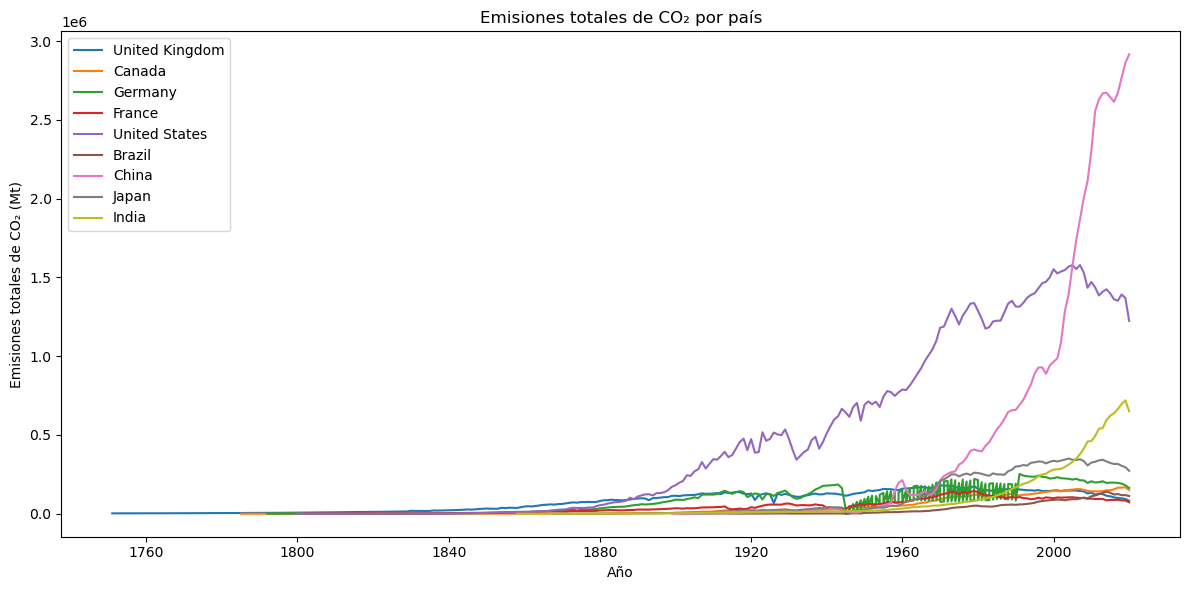

In [155]:
# Gráfica de emisiones totales por pais
paises = ['United Kingdom', 'Canada', 'Germany', 'France',
          'United States', 'Brazil', 'China', 'Japan', 'India']
plt.figure(figsize=(12, 6))
for pais in paises:
    datos_pais = df_co2[df_co2['Country'] == pais].sort_values('Year')
    plt.plot(datos_pais['Year'], datos_pais['Total'], label=pais)
plt.title('Emisiones totales de CO₂ por país')
plt.xlabel('Año')
plt.ylabel('Emisiones totales de CO₂ (Mt)')
plt.legend()
plt.tight_layout()
plt.show()

Segú el gráfico anterior, China lidera en emisiones desde los años 2000 en adelante. Por su parte Estados Unidos fue el mayor emisor durante décadas, pero sus emisiones han disminuido ultimamente. En cambio la India muestra un crecimiento continuo en las ultimas decadas, esto se debe a su gran población y la industria creciente en los ultimo años. En cuanto a los Países desarrollados de Europa y Japón mantienen niveles más estables.

### Pregunta 2.4

Para el año 2007, por cada país realice un ranking de las fuentes con más emisiones de CO2 excluyendo las variables `Per Capita` y `Bunker fuels (Not in Total)`. Es decir, asigne un número de 1 a 5 a $\{$ `Solid Fuel`, `Liquid Fuel`, `Gas Fuel`, `Cement`, `Gas Flaring` $\}$, donde 1 es la mayor fuente de emisión de ese país en aquel año, y 5 indica que fue la menor; así para todos los países.

Si en 2007 no se reporta una fuente de emisión para un país, por ejemplo, si emisiones de `Gas Flaring` no se reportara, entonces asigne números de 1 a 4 a las fuentes restantes. Análogo para un menor número de datos.

Luego, por cada variable grafique un histograma de frecuencias del ranking que obtuvo la fuente emisión a lo largo de todos los países.

¿Cuál fue la fuente más contaminante en la mayoría de países en 2007?


In [156]:
# Filtrar año 2007
df_2007 = df_co2[df_co2['Year'].dt.year == 2007].copy()
fuentes = ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring']
# Crear df vacío para guardar rankings
ranking_final = pd.DataFrame()
# Aplicar ranking por país con manejo de fuentes faltantes
for _, fila in df_2007.iterrows():
    pais = fila['Country']
    emisiones = fila[fuentes]
    emisiones_no_nulas = emisiones.dropna()

    if len(emisiones_no_nulas) == 0:
        continue  # si no hay datos para este país, saltamos
    # Rankear (1 = más contaminante)
    ranking = emisiones_no_nulas.rank(method='min', ascending=False).astype('Int64')
    fila_rank = pd.Series(ranking, name=pais)
    ranking_final = pd.concat([ranking_final, fila_rank], axis=1)
# Transponer para que cada fila sea un país, columnas = fuentes
ranking_final = ranking_final.T
print(ranking_final)

                           Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
Afghanistan                         2            1         3       4   
Albania                             3            1         4       2   
Algeria                             5            2         1       4   
Andorra                             2            1      <NA>       2   
Angola                           <NA>            2         3       4   
...                               ...          ...       ...     ...   
Vietnam                             2            1         4       3   
Wallis And Futuna Islands        <NA>            1      <NA>       2   
Yemen, Rep.                      <NA>            1      <NA>       2   
Zambia                              2            1      <NA>       3   
Zimbabwe                            1            2      <NA>       3   

                           Gas Flaring  
Afghanistan                       <NA>  
Albania                           <NA>  
Algeria     

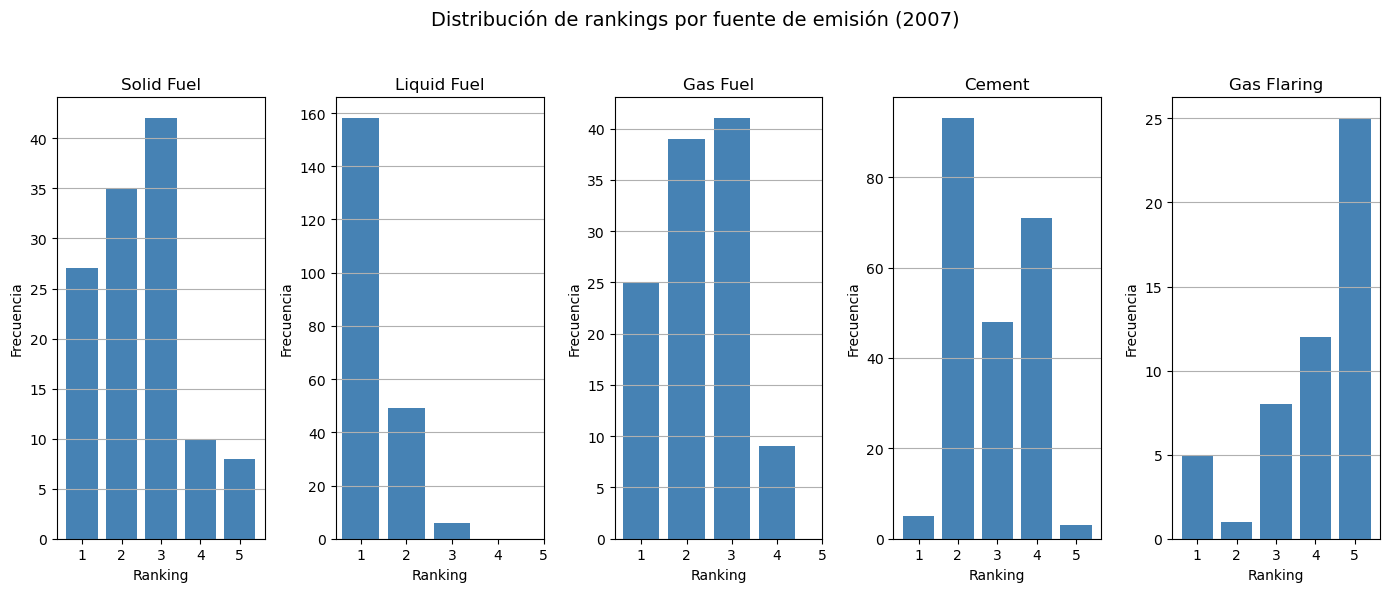

In [157]:
# Análisis Gráfico histograma por fuente con más emisiones de CO2
fig, axes = plt.subplots(1, 5, figsize=(14, 6))  # 2 filas, 3 columnas (1 queda vacío)
axes = axes.flatten()
for i, fuente in enumerate(fuentes):
    ranking_counts = ranking_final[fuente].value_counts().sort_index()
    axes[i].bar(ranking_counts.index, ranking_counts.values, color='steelblue')
    axes[i].set_title(f'{fuente}')
    axes[i].set_xlabel('Ranking')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xticks(range(1, 6))
    axes[i].grid(axis='y')
fig.suptitle('Distribución de rankings por fuente de emisión (2007)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

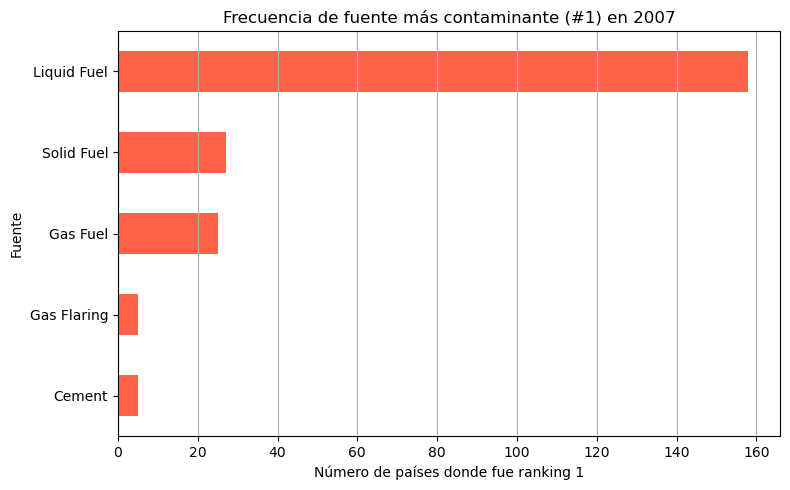

In [158]:
# Gráfico total
ranking_1 = (ranking_final == 1).sum().sort_values(ascending=True)
plt.figure(figsize=(8, 5))
ranking_1.plot(kind='barh', color='tomato')
plt.title('Frecuencia de fuente más contaminante (#1) en 2007')
plt.xlabel('Número de países donde fue ranking 1')
plt.ylabel('Fuente')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



---


El análisis de los resultados, la fuente de emisión más contaminante en la mayoría de países en 2007 fue Liquid Fuel, con diferencia significativa respecto a las demás. Mas de 150 países la ubicaron como su principal fuente de CO₂. En contraste, fuentes como Cement y Gas Flaring ocuparon con mayor frecuencia los rankings más bajos, indicando una menor participación relativa en las emisiones globales. Esta distribución sugiere que el uso de combustibles líquidos, como derivados del petróleo, fue la principal fuente de emisiones en ese año a nivel mundial en 2007.

---





### Pregunta 2.5

Para cada serie de total de emisiones por país, calcule el cambio porcentual a través del tiempo. Realice imputación de missings si considera necesario, justificando su imputación. Si no lo considera necesario, también justifique (se evaluará un buen criterio fundamentado).

Repita el ejercicio del gráfico de series de tiempo anterior, pero graficando los **cambios porcentuales** para años mayores o iguales a 1995. ¿Cómo interpretaría económicamente el shock sobre las emisiones de CO2 tanto en la crisis subprime como en la crisis del Covid-19?


In [159]:
# Revisar si hay valores nulos
total_nulos = df_co2.isna().sum()
porcentaje_nulos = (df_co2.isna().sum() / len(df_co2)) * 100
nulos_df = pd.DataFrame({
    'Valores Nulos': total_nulos,
    '% de Nulos': porcentaje_nulos.round(2)
}).sort_values(by='% de Nulos', ascending=False).reset_index()
nulos_df = nulos_df.rename(columns={'index': 'Variable'})
print(nulos_df)

                      Variable  Valores Nulos  % de Nulos
0                  Gas Flaring          16093       85.74
1                     Gas Fuel           8158       43.47
2                   Solid Fuel           5691       30.32
3                   Per Capita           5524       29.43
4                  Liquid Fuel            619        3.30
5                       Cement            517        2.75
6  Bunker fuels (Not in Total)            289        1.54
7                         Year              0        0.00
8                      Country              0        0.00
9                        Total              0        0.00


In [160]:
# Ordenamos por país y fecha
df_co2.sort_values(['Country', 'Year'], inplace=True)
# Calculamos cambio porcentual de emisiones totales por país
df_co2['pct_change_total'] = df_co2.groupby('Country')['Total'].pct_change() * 100
# Verificamos los valores nulos generados por el cálculo
missing_total = df_co2['pct_change_total'].isna().sum()
missing_por_pais = df_co2[df_co2['pct_change_total'].isna()].groupby('Country').size()
missing_por_pais = missing_por_pais.sort_values(ascending=False)
# Mostrar los 15 países con más missings (puedes ajustar el número)
top_missing = missing_por_pais.head(15)
print(top_missing)

Country
Reunion                     61
French Guiana               61
Martinique                  50
Guadeloupe                  50
Saint Helena                29
Mayotte                     21
Turks And Caicos Islands    20
Botswana                    20
Antarctic Fisheries         17
Seychelles                  13
Vanuatu                     12
Barbados                    10
United Arab Emirates         9
Cayman Islands               6
Iran                         6
dtype: int64


In [161]:
# Interpolación
df_co2['pct_change_total_imputado'] = df_co2.groupby('Country')['pct_change_total'].transform(
    lambda x: x.interpolate(method='linear')
)
df_pct = df_co2
# Verificar imputación
print("Valores nulos antes:", df_co2['pct_change_total'].isna().sum())
print("Valores nulos después de imputar:", df_co2['pct_change_total_imputado'].isna().sum()) # Los restantes puede ser del inicio de la serie de cada pais.

Valores nulos antes: 653
Valores nulos después de imputar: 584


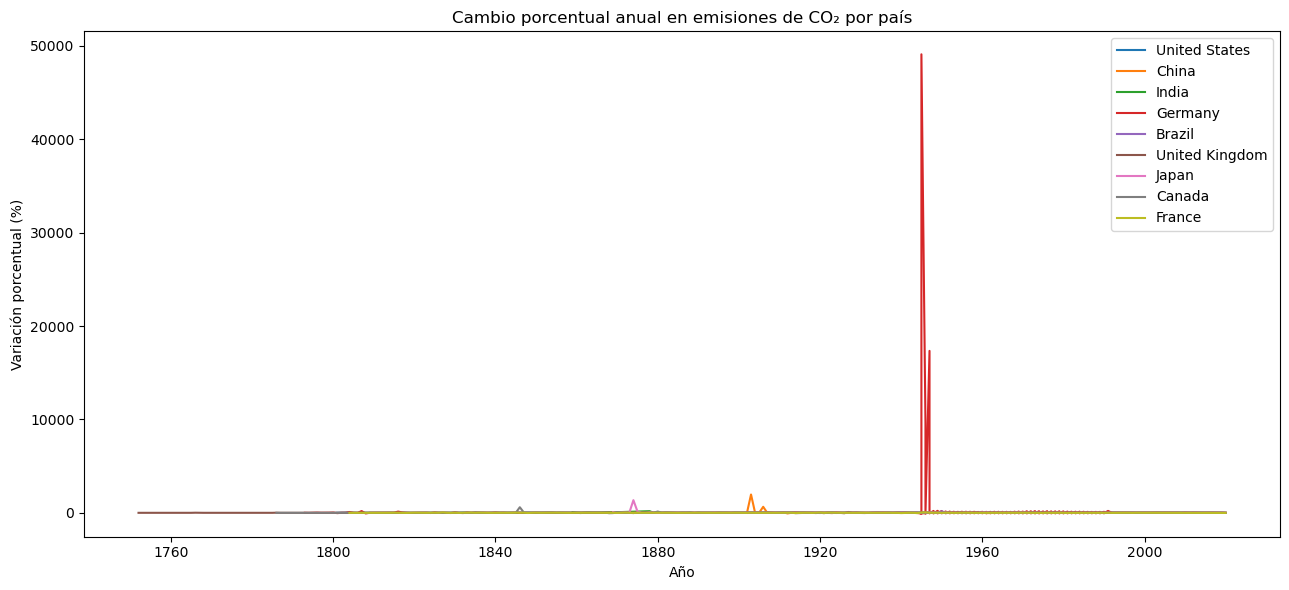

In [162]:
paises = ['United States', 'China', 'India', 'Germany', 'Brazil', 'United Kingdom', 'Japan', 'Canada', 'France']
# Graficar
plt.figure(figsize=(13, 6))
for pais in paises:
    data = df_pct[df_pct['Country'] == pais]
    plt.plot(data['Year'], data['pct_change_total'], label=pais)
plt.title('Cambio porcentual anual en emisiones de CO₂ por país')
plt.xlabel('Año')
plt.ylabel('Variación porcentual (%)')
plt.legend()
plt.tight_layout()
plt.show()

La interpolación lineal es uno de los métodos más apropiados para rellenar los valores ausentes en la variación porcentual de emisiones (pct_change_total), ya que mantiene la continuidad de la serie y previene distorsiones que podrían surgir con técnicas basadas en promedios o valores fijos. De esta manera se cálcula de manera consistente los valores intermedios cuando hay datos disponibles antes y después del faltante, resultando particularmente valioso para países con interrupciones específicas en sus registros de emisiones.
Con respecto al analisis gráfico podemos observar un gran tope para alemania esto en las fechas de la segunda guerra mundial donde aumentó de forma alarmante y considerable su emsion de CO2.

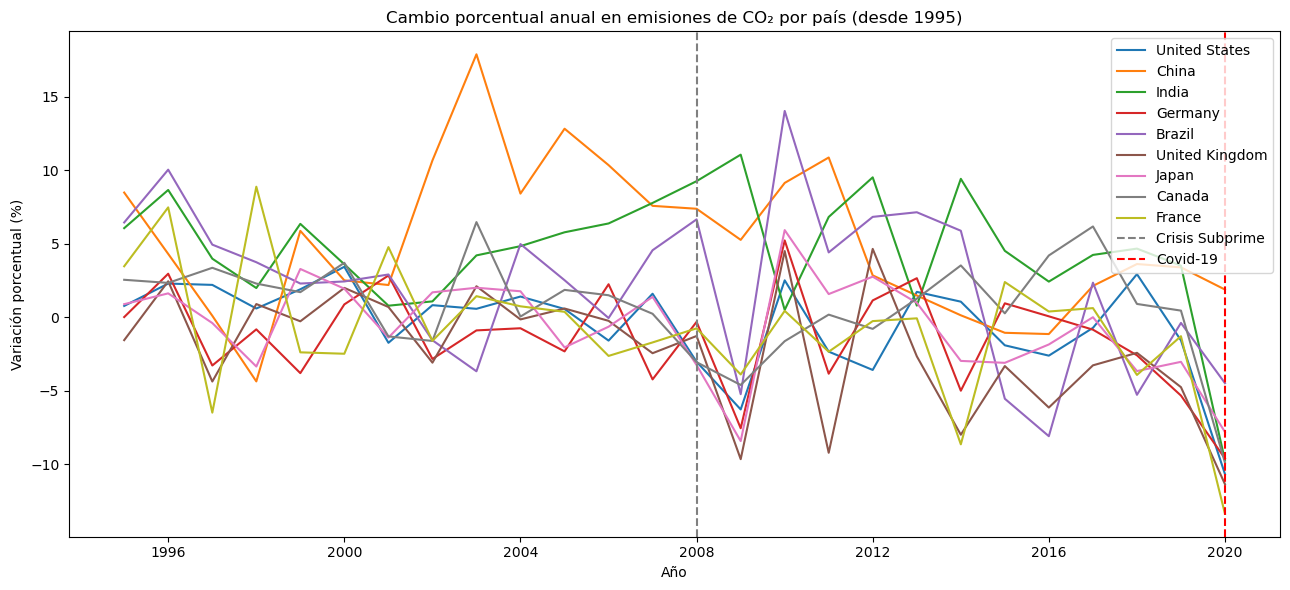

In [163]:
# Gráfico de 1995 en delante
df_pct_1995 =df_pct[df_pct['Year'].dt.year >= 1995]
plt.figure(figsize=(13, 6))
for pais in paises:
    data = df_pct_1995[df_pct_1995['Country'] == pais]
    plt.plot(data['Year'], data['pct_change_total'], label=pais)
# Marcar eventos económicos globales
plt.axvline(pd.to_datetime('2008'), color='gray', linestyle='--', label='Crisis Subprime')
plt.axvline(pd.to_datetime('2020'), color='red', linestyle='--', label='Covid-19')
plt.title('Cambio porcentual anual en emisiones de CO₂ por país (desde 1995)')
plt.xlabel('Año')
plt.ylabel('Variación porcentual (%)')
plt.legend()
plt.tight_layout()
plt.show()


---


Desde un punto de vista económico, el gráfico refleja con claridad cómo las emisiones de CO2 responden directamente a los ciclos de actividad económica. Durante la crisis subprime de 2008, la caída en la inversión, la producción industrial y el comercio internacional provocó una contracción en la demanda energética, generando un descenso en las emisiones, especialmente en economías desarrolladas con sectores industriales intensivos. En 2020, el shock fue más pronunciado hacia la baja, la pandemia del Covid-19 generó una paralización de las actividades casi total a nivel mundial por las medidas fitosanitarias y cierres totales (cuarentenas) y posteriormente parciales, el transporte y múltiples sectores productivos, causando una fuerte contracción del PIB y, con ello, una reducción abrupta de las emisiones. Estas situaciones confirman que las emisiones de CO2 reflejan patrones tecnológicos, demográficos, asi como tambien están profundamente influenciados por la evolución de la actividad económica, funcionando casi como un indicador indirecto del nivel de producción y consumo de una economía.



---





### Pregunta 2.6

Calcule el promedio a lo largo de toda la muestra ($\mathbb{E}[\cdot]$) para el cambio porcentual de cada país y genere una nueva serie con la resta entre el cambio porcentual del país $i$ en el año $t$, y el promedio del cambio porcentual del país $i$. En otras palabras, genere una serie con _**desvíos del cambio porcentual promedio**_ $\forall i,t$:

$$Nueva Serie_i = \Delta \% TotalCO2_{i,t} - \mathbb{E}[{\Delta \% TotalCO2_{i,t}}]$$

Luego, para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Japón
- Italia
- España


grafique en un panel _1x2_ la desviación del cambio porcentual respecto al promedio entre 2007 y 2010 en lado izquierdo, y entre 2017 y 2020 en el lado derecho (Hint: Hay comandos que facilitan esta labor. Puede intentar con `fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)`, por ejemplo).

¿Existe algún país en particular que mostró mayores desviaciones atípicas de emisión de CO2 durante el periodo de la crisis sub-prime? ¿Cómo es el comportamiento de las desviaciones atípicas de CO2 de este país durante la crisis del Covid-19?


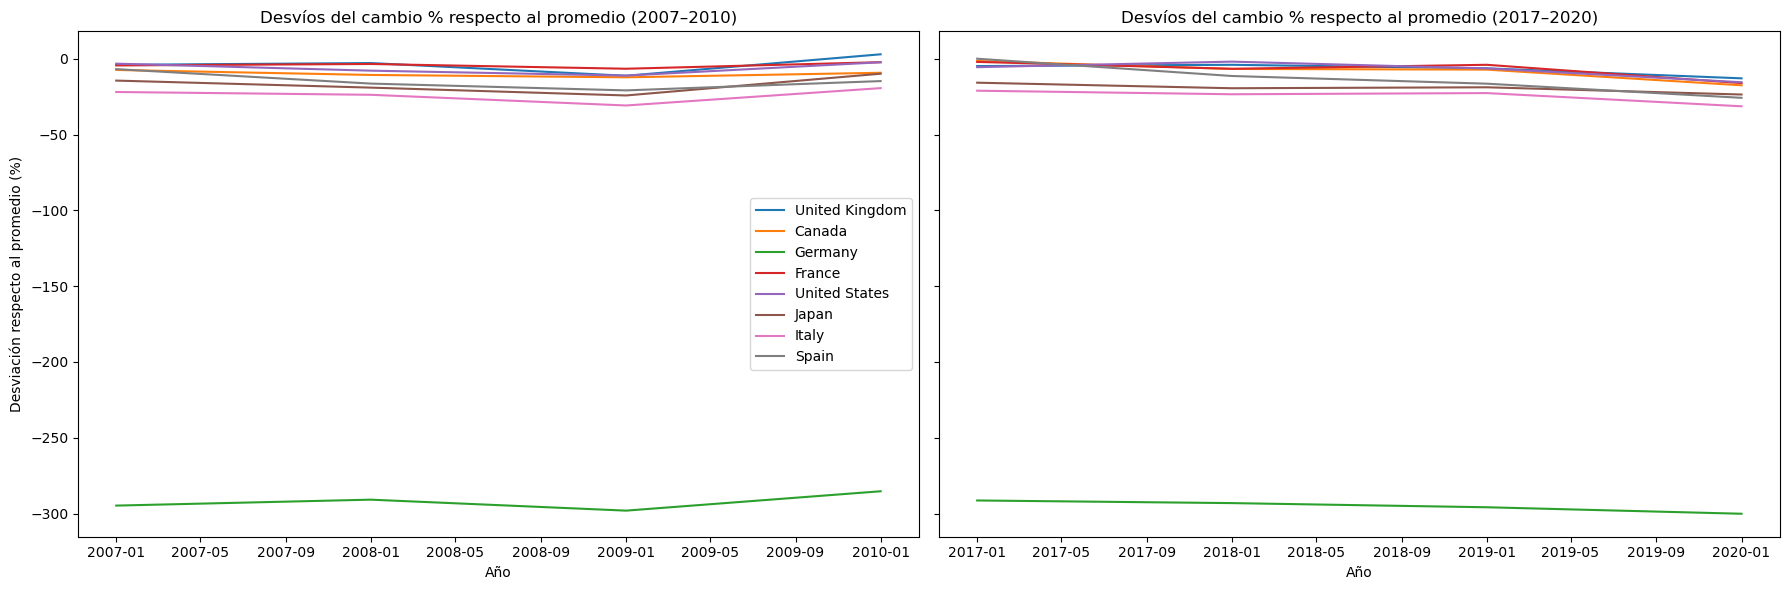

In [164]:
media_x_country = df_co2.groupby('Country')['pct_change_total'].transform('mean') # Calcular el promedio del cambio porcentual por país
df_co2['desvio_pct'] = df_co2['pct_change_total'] - media_x_country # Crear nueva serie: desviación del cambio respecto al promedio de cada país
# Seleccionar países objetivo
paises_objetivo = ['United Kingdom', 'Canada', 'Germany', 'France', 'United States', 'Japan', 'Italy', 'Spain']
df_filtrado = df_co2[df_co2['Country'].isin(paises_objetivo)].copy()
# Separar periodos: crisis subprime y covid
periodo_subprime = df_filtrado[(df_filtrado['Year'].dt.year >= 2007) & (df_filtrado['Year'].dt.year <= 2010)]
periodo_covid = df_filtrado[(df_filtrado['Year'].dt.year >= 2017) & (df_filtrado['Year'].dt.year <= 2020)]
# Graficar en panel 1x2 con ejes compartidos
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
# Gráfico izquierda: crisis subprime
for pais in paises_objetivo:
    data = periodo_subprime[periodo_subprime['Country'] == pais]
    axes[0].plot(data['Year'], data['desvio_pct'], label=pais)
axes[0].set_title('Desvíos del cambio % respecto al promedio (2007–2010)')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Desviación respecto al promedio (%)')
axes[0].legend()
# Gráfico derecha: crisis Covid-19
for pais in paises_objetivo:
    data = periodo_covid[periodo_covid['Country'] == pais]
    axes[1].plot(data['Year'], data['desvio_pct'], label=pais)
axes[1].set_title('Desvíos del cambio % respecto al promedio (2017–2020)')
axes[1].set_xlabel('Año')
plt.tight_layout()
plt.show()

---


Según los gráficos anteriores, durante la crisis subprime (2007–2010), Alemania mostró una desviación extremadamente negativa en sus emisiones de CO2 respecto a su promedio histórico, lo que refleja el alto grado de sensibilidad de su economía industrializada ante shocks económicos globales. La caída de la demanda internacional y la fuerte contracción de la producción manufacturera el cual es un sector clave en Alemania pudieron provocar una disminución significativa en el consumo energético y, por tanto, en las emisiones.

En contraste, durante la pandemia del Covid-19 (2017–2020), si bien Alemania siguió presentando desviaciones negativas, estas fueron más moderadas. Esto puede deberse a una mayor resiliencia de su economía, una recuperación más rápida del comercio global, y el efecto de políticas energéticas estructurales como la transición hacia energías renovables, que ya habían reducido parte de su intensidad contaminante. Así, el impacto ambiental del Covid-19 en Alemania, aunque relevante, fue menos atípico comparado con el colapso observado en la crisis de 2008.



---





### Pregunta 2.7

Genere un nuevo dataframe llamado `df_final`. Para esto, realice un INNER JOIN entre el dataframe `df_co2` y `df_merged` por "año y país" (debería terminar sólo con valores de 2007 si usted realiza un INNER JOIN).

Finalmente, grafique un mapa de calor de correlaciones (_heatmapt_) entre las variables numéricas ,excluyendo fechas.

¿Qué variables económicas, demográficas y de desarrollo humano muestran relación más importante con las emisiones de CO2? Interprete estas relaciones.


In [165]:
df_co2 = df_co2.drop(columns=['pct_change_total', 'pct_change_total_imputado', 'desvio_pct']) # limpiamos las variables que no necesitamos
df['Country'] = df['Country'].replace(country_name_mapping_co2) # Aplicamos el mapeo sobre df
df_co2 = df_co2.rename(columns={'Year' : 'date'}) # Estandarizo la variable country previo a realizar  el inner join
df_final = pd.merge(df, df_co2, how='inner', on=['Country', 'date'])
print(df_final)#Verificamos

          date      Country                               Region   Population  \
0   2007-01-01  Afghanistan        ASIA (EX. NEAR EAST)           31056997.00   
1   2007-01-01      Albania  EASTERN EUROPE                        3581655.00   
2   2007-01-01      Algeria  NORTHERN AFRICA                      32930091.00   
3   2007-01-01      Andorra  WESTERN EUROPE                          71201.00   
4   2007-01-01       Angola  SUB-SAHARAN AFRICA                   12127071.00   
..         ...          ...                                  ...          ...   
199 2007-01-01    Venezuela              LATIN AMER. & CARIB      25730435.00   
200 2007-01-01      Vietnam        ASIA (EX. NEAR EAST)           43087995.25   
201 2007-01-01  Yemen, Rep.  NEAR EAST                            21456188.00   
202 2007-01-01       Zambia  SUB-SAHARAN AFRICA                   11502010.00   
203 2007-01-01     Zimbabwe  SUB-SAHARAN AFRICA                   12236805.00   

     Area (sq. mi.)  Pop. D

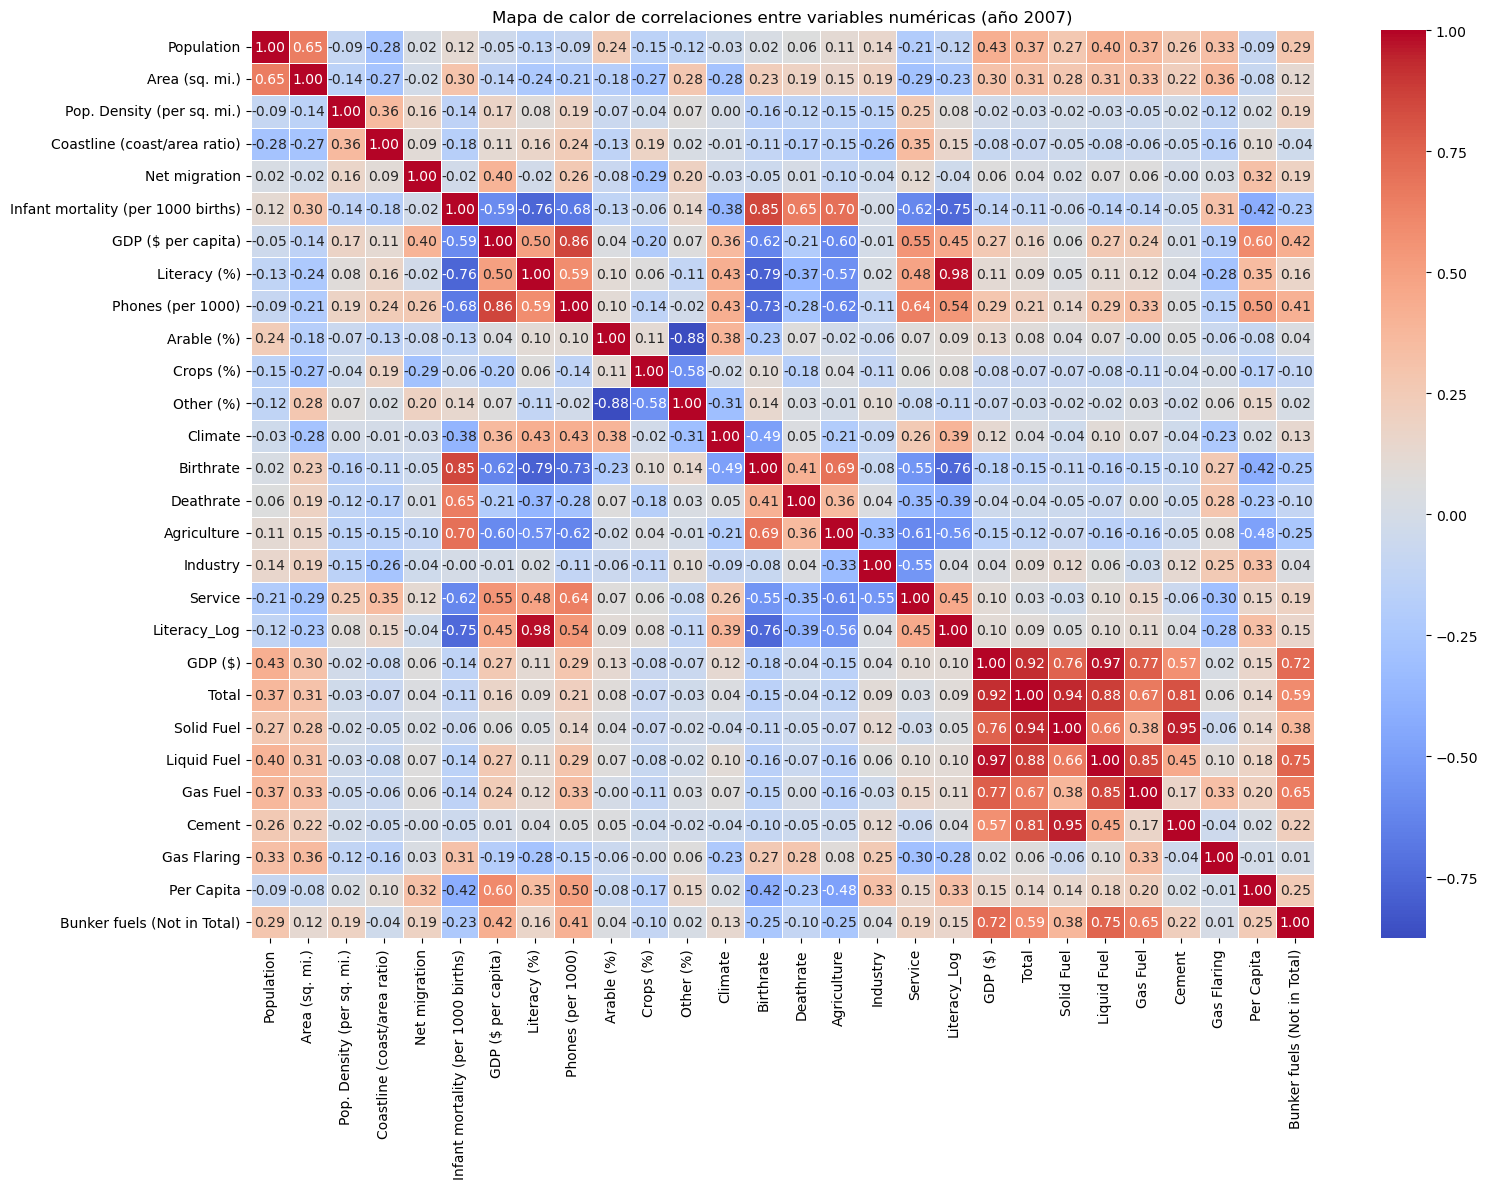

In [166]:
# Filtrar solo variables numéricas (excluyendo columnas tipo fecha)
df_numericas = df_final.select_dtypes(include='number')
columnas_fecha = ['Year', 'date_x', 'date_y']
df_numericas = df_numericas.drop(columns=[col for col in columnas_fecha if col in df_numericas.columns])
matriz_corr = df_numericas.corr() # Matriz de correlación
# Graficar el heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas (año 2007)")
plt.tight_layout()
plt.show()

---


El análisis del mapa de calor de correlaciones para el año 2007 muestra que la variable con mayor correlación positiva es el PIB total, lo que indica que las economías más grandes emiten más CO₂, reflejando su mayor nivel de producción, transporte y consumo energético. También destaca la industria, con una fuerte correlación, dado que este sector es intensivo en el uso de energía fósil. Incluso el sector servicios presenta correlación positiva, aunque menor, lo que va de la mano con los países más desarrollados que demandan este tipo de energía.

Desde el ámbito demográfico y del desarrollo humano la población total y el tamaño del país se contrastan positivamente a las emisiones, ya que más personas y mayor infraestructura requieren mayor consumo de energía. En cuanto al desarrollo humano, variables como alfabetización y teléfonos por habitante también tienen correlación positiva con las emisiones, indicando que un mayor acceso a educación y tecnología suele acompañar un aumento en la demanda energética. Por otro ultimo, la mortalidad infantil muestra una correlación negativa, ya que los países con peores indicadores sociales tienden a ser menos desarrollados y, por tanto, emiten menos. En todo su conjunto, estos resultados reflejan que el desarrollo económico y social tiende a ir acompañado de un aumento en las emisiones de CO2.


---
